<a id='intro'></a>
# Data structures

## Introduction

This is a getting started tutorial for Gammapy.

In this tutorial we will use the [Third Fermi-LAT Catalog of High-Energy Sources (3FHL) catalog](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/3FHL/), corresponding event list and images to learn how to work with some of the central Gammapy data structures.

We will cover the following topics:

* [**Sky maps**](#smaps)
  * We will learn how to handle image based data with gammapy using a Fermi-LAT 3FHL example image. We will work with the following classes:
    - `~gammapy.maps.WcsNDMap`
    - [astropy.coordinates.SkyCoord](http://astropy.readthedocs.io/en/latest/coordinates/index.html)
    - [numpy.ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)

* [**Event lists**](#elists)
  * We will learn how to handle event lists with Gammapy. Important for this are the following classes: 
    - `~gammapy.data.EventList`
    - [astropy.table.Table](http://docs.astropy.org/en/stable/api/astropy.table.Table.html)

* [**Source catalogs**](#scatalogs)
  * We will show how to load source catalogs with Gammapy and explore the data using the following classes:
    - `~gammapy.catalog.SourceCatalog`, specifically `~gammapy.catalog.SourceCatalog3FHL`
    - [astropy.table.Table](http://docs.astropy.org/en/stable/api/astropy.table.Table.html)

* [**Spectral models and flux points**](#smodels)
  * We will pick an example source and show how to plot its spectral model and flux points. For this we will use the following classes:
    - `~gammapy.modeling.models.SpectralModel`, specifically the `~gammapy.modeling.models.PowerLaw2SpectralModel`
    - `~gammapy.estimators.FluxPoints`
    - [astropy.table.Table](http://docs.astropy.org/en/stable/api/astropy.table.Table.html)


🔝 [Back to Top](#intro)<br>

## Setup

**Important**: to run this tutorial the environment variable `GAMMAPY_DATA` must be defined and point to the directory on your machine where the datasets needed are placed. To check whether your setup is correct you can execute the following cell:



In [1]:
import os

path = os.path.expandvars("$GAMMAPY_DATA")

if not os.path.exists(path):
    raise Exception("gammapy-data repository not found!")
else:
    print("Great your setup is correct!")

Great your setup is correct!


In case you encounter an error, you can un-comment and execute the following cell to continue. But we recommend to set up your environment correctly as described in [getting started](https://docs.gammapy.org/dev/getting-started/index.html#download-tutorials) after you are done with this notebook.

In [2]:
# os.environ['GAMMAPY_DATA'] = os.path.join(os.getcwd(), '..')

Now we can continue with the usual IPython notebooks and Python imports:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# defines, converts between, and performs arithmetic with physical quantities (meters, seconds, Hz, etc) and logarithmic units (magnitude and decibel)
import astropy.units as u 
# representation, manipulation, and transformation between systems of celestial coordinates.
from astropy.coordinates import SkyCoord

🔝 [Back to Top](#intro)<br>

<a id='smaps'></a>
## Sky Maps

The `~gammapy.maps` package contains classes to work with sky images and cubes.

In this section, we will use a simple 2D sky image and will learn how to:

* Read sky images from FITS files
* Smooth images
* Plot images
* Cutout parts from images

In [5]:
from gammapy.maps import Map

gc_3fhl = Map.read("$GAMMAPY_DATA/fermi-3fhl-gc/fermi-3fhl-gc-counts.fits.gz")

The image is a `~gammapy.maps.WcsNDMap` object:

In [6]:
gc_3fhl

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat']
	shape : (400, 200)
	ndim  : 2
	unit  : 
	dtype : >i8

The shape of the image is 400 x 200 pixel and it is defined using a cartesian projection in galactic coordinates.

The ``geom`` attribute is a `~gammapy.maps.WcsGeom` object:

In [7]:
gc_3fhl.geom

WcsGeom

	axes       : ['lon', 'lat']
	shape      : (400, 200)
	ndim       : 2
	frame      : galactic
	projection : CAR
	center     : 0.0 deg, 0.0 deg
	width      : 20.0 deg x 10.0 deg
	wcs ref    : 0.0 deg, 0.0 deg

Let's take a closer look a the `.data` attribute:

In [8]:
gc_3fhl.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

That looks familiar! It just an *ordinary* 2 dimensional numpy array,  which means you can apply any known numpy method to it:

In [9]:
print(f"Total number of counts in the image: {gc_3fhl.data.sum():.0f}")

Total number of counts in the image: 32684


To show the image on the screen we can use the ``plot`` method. It basically calls [plt.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html), passing the `gc_3fhl.data` attribute but in addition handles axis with world coordinates using [astropy.visualization.wcsaxes](https://docs.astropy.org/en/stable/visualization/wcsaxes/) and defines some defaults for nicer plots (e.g. the colormap 'afmhot'):

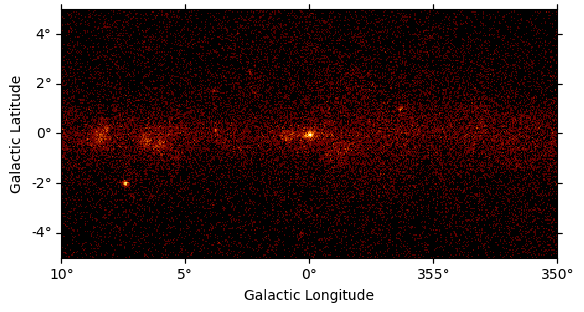

In [10]:
gc_3fhl.plot(stretch="sqrt");

Examples of plotting images with the WCSAxes package:

In [11]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('galactic_center/gc_msx_e.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

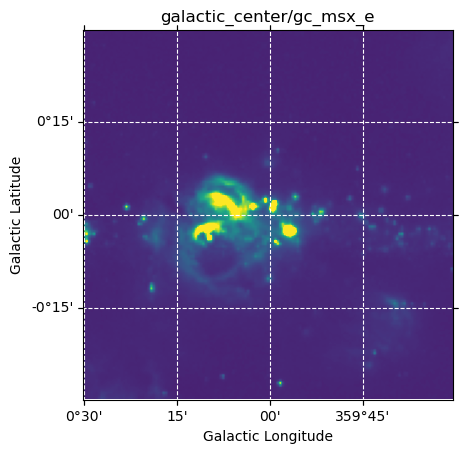

In [12]:
# A simple example
plt.subplot(projection=wcs)

plt.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')

plt.title("galactic_center/gc_msx_e")

plt.grid(color='white', ls='--')

plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')

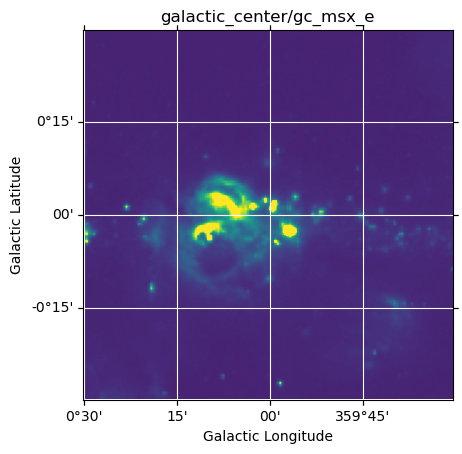

In [13]:
# For example, using the partially object-oriented interface
ax = plt.subplot(projection=wcs)

plt.title("galactic_center/gc_msx_e")

ax.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')

ax.grid(color='white', ls='solid')

ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

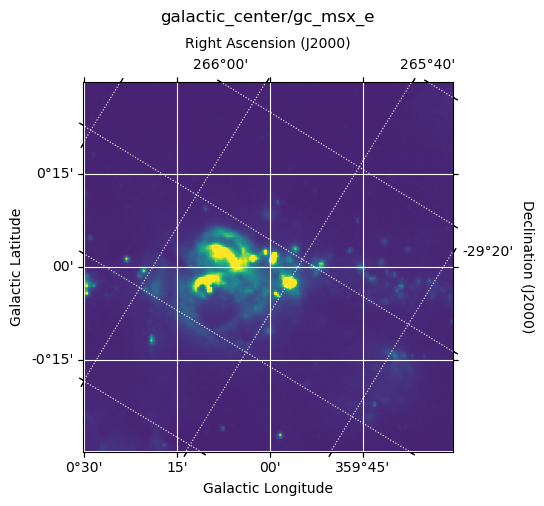

In [14]:
# For example, using advanced functionalities
ax = plt.subplot(projection=wcs, label='overlays')

plt.title("galactic_center/gc_msx_e", y = 1.14)

ax.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')

ax.coords.grid(True, color='white', ls='solid')

ax.coords[0].set_axislabel('Galactic Longitude')
ax.coords[1].set_axislabel('Galactic Latitude')

overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')

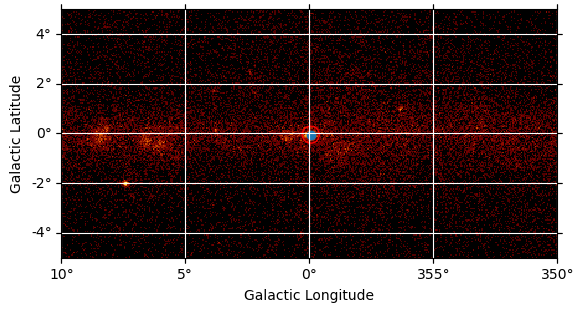

In [15]:
ax = gc_3fhl.plot(stretch="sqrt");
#ax = plt.subplot(projection=wcs)
#ax.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')
ax.grid(color='white', ls='solid')
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')
#ax.scatter([0], [1], transform=ax.get_transform('world'))
ax.scatter(359.94423568, -0.04616002, transform=ax.get_transform('galactic'), s=150,
           edgecolor='red', facecolor='none')
ax.scatter([359.94423568], [-0.04616002], transform=ax.get_transform('galactic'))

To make the structures in the image more visible we will smooth the data using a Gaussian kernel.

In [16]:
gc_3fhl_smoothed = gc_3fhl.smooth(kernel="gauss", width=0.2 * u.deg)

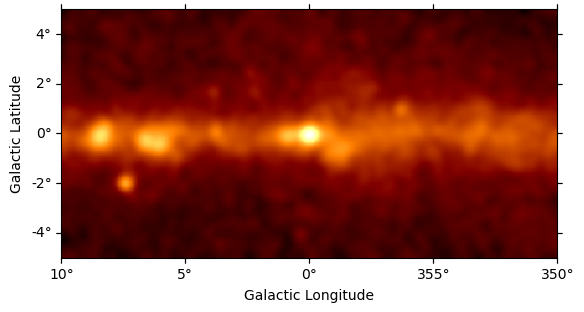

In [17]:
gc_3fhl_smoothed.plot(stretch="sqrt");

The smoothed plot already looks much nicer, but still the image is rather large. As we are mostly interested in the inner part of the image, we will cut out a quadratic region of the size 9 deg x 9 deg around Vela. Therefore we use `~gammapy.maps.Map.cutout` to make a cutout map:

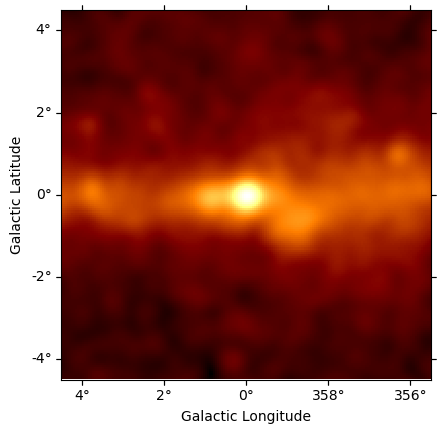

In [18]:
# define center and size of the cutout region
center = SkyCoord(0, 0, unit="deg", frame="galactic")
gc_3fhl_cutout = gc_3fhl_smoothed.cutout(center, 9 * u.deg)
gc_3fhl_cutout.plot(stretch="sqrt");

For a more detailed introduction to `~gammapy.maps`, take a look a the [maps.ipynb](../api/maps.ipynb) notebook.

### Exercises

* Add a marker and circle at the position of `Sag A*` (you can find examples in [astropy.visualization.wcsaxes](https://docs.astropy.org/en/stable/visualization/wcsaxes/)).

🔝 [Back to Top](#intro)<br>

<a id='elists'></a>
## Event lists

Almost any high level gamma-ray data analysis starts with the raw measured counts data, which is stored in event lists. In Gammapy event lists are represented by the `~gammapy.data.EventList` class. 

In this section we will learn how to:

* Read event lists from FITS files
* Access and work with the `EventList` attributes such as `.table` and `.energy` 
* Filter events lists using convenience methods

Let's start with the import from the `~gammapy.data` submodule:

In [19]:
from gammapy.data import EventList

Very similar to the sky map class an event list can be created, by passing a filename to the `~gammapy.data.EventList.read()` method:

In [20]:
events_3fhl = EventList.read(
    "$GAMMAPY_DATA/fermi-3fhl-gc/fermi-3fhl-gc-events.fits.gz"
)

You can find examples in [gammapy.data.EventList](gammapy.data.EventList).

In [21]:
# filename = "$GAMMAPY_DATA/hess-dl3-dr1/data/hess_dl3_dr1_obs_id_023523.fits.gz"
# events = EventList.read(filename)

# #Plot the offset^2 distribution wrt. the observation pointing position
# #(this is a commonly used plot to check the background spatial distribution):
# events.plot_offset2_distribution() 
# Plot the offset^2 distribution wrt. the Crab pulsar position (this is
# commonly used to check both the gamma-ray signal and the background
# spatial distribution):
    

This time the actual data is stored as an [astropy.table.Table](http://docs.astropy.org/en/stable/api/astropy.table.Table.html) object. It can be accessed with `.table` attribute: 

In [22]:
events_3fhl

In [23]:
print(events_3fhl)

EventList
---------

  Instrument       : LAT
  Telescope        : GLAST
  Obs. ID          : 

  Number of events : 32843
  Event rate       : 0.000 1 / s

  Time start       : 54682.65603222222
  Time stop        : 57236.96833546296

  Min. energy      : 1.00e+04 MeV
  Max. energy      : 1.92e+06 MeV
  Median energy    : 1.58e+04 MeV




In [24]:
events_3fhl.table

ENERGY,RA,DEC,L,B,THETA,PHI,ZENITH_ANGLE,EARTH_AZIMUTH_ANGLE,TIME,EVENT_ID,RUN_ID,RECON_VERSION,CALIB_VERSION [3],EVENT_CLASS [32],EVENT_TYPE [32],CONVERSION_TYPE,LIVETIME,DIFRSP0,DIFRSP1,DIFRSP2,DIFRSP3,DIFRSP4
MeV,deg,deg,deg,deg,deg,deg,deg,deg,s,,,,,,,,s,,,,,
float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,int32,int32,int16,int16,bool,bool,int16,float64,float32,float32,float32,float32,float32
12186.642,260.45935,-33.553337,353.36273,1.7538676,71.977325,125.50694,59.22307,231.79672,239572401.29222104,1823040,239571670,0,0 .. 0,False .. True,False .. True,0,238.57837238907814,0.0,0.0,0.0,0.0,0.0
25496.598,261.37506,-34.395004,353.09607,0.6520652,42.49406,278.49347,41.092773,227.89838,239577842.16217342,550833,239577663,0,0 .. 0,False .. True,False .. False,1,176.16850754618645,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18465.783,266.39728,-29.105953,359.85202,-0.08294058,55.97552,135.87787,18.909636,112.137924,459939497.057684,7689831,459935572,0,0 .. 0,False .. True,False .. True,0,70.72638684511185,0.0,0.0,0.0,0.0,0.0
14457.25,262.72217,-34.388405,353.7184,-0.26906812,45.683174,237.74162,25.728264,240.87035,459945845.4798405,10049680,459941302,0,0 .. 0,False .. True,False .. True,0,147.4274787902832,0.0,0.0,0.0,0.0,0.0


[Click here](#elparameters) to see the descriptions of the reconstructed parameters.

<b>TIP</b><br>Get help on the available readers for `Table` using the``help()`` method:
```python
Table.read.help()  # Get help reading Table and list supported formats
Table.read.help('fits')  # Get detailed help on Table FITS reader
Table.read.list_formats()  # Print list of available formats
```

You can do *len* over event_3fhl.table to find the total number of events.

In [25]:
len(events_3fhl.table)

32843

In [26]:
events_3fhl.table.info

<Table length=32843>
        name         dtype  shape unit
------------------- ------- ----- ----
             ENERGY float32        MeV
                 RA float32        deg
                DEC float32        deg
                  L float32        deg
                  B float32        deg
              THETA float32        deg
                PHI float32        deg
       ZENITH_ANGLE float32        deg
EARTH_AZIMUTH_ANGLE float32        deg
               TIME float64          s
           EVENT_ID   int32           
             RUN_ID   int32           
      RECON_VERSION   int16           
      CALIB_VERSION   int16  (3,)     
        EVENT_CLASS    bool (32,)     
         EVENT_TYPE    bool (32,)     
    CONVERSION_TYPE   int16           
           LIVETIME float64          s
            DIFRSP0 float32           
            DIFRSP1 float32           
            DIFRSP2 float32           
            DIFRSP3 float32           
            DIFRSP4 float32           

And we can access any other attribute of the `Table` object as well:

In [27]:
events_3fhl.table.colnames

['ENERGY',
 'RA',
 'DEC',
 'L',
 'B',
 'THETA',
 'PHI',
 'ZENITH_ANGLE',
 'EARTH_AZIMUTH_ANGLE',
 'TIME',
 'EVENT_ID',
 'RUN_ID',
 'RECON_VERSION',
 'CALIB_VERSION',
 'EVENT_CLASS',
 'EVENT_TYPE',
 'CONVERSION_TYPE',
 'LIVETIME',
 'DIFRSP0',
 'DIFRSP1',
 'DIFRSP2',
 'DIFRSP3',
 'DIFRSP4']

For convenience we can access the most important event parameters as properties on the `EventList` objects. The attributes will return corresponding Astropy objects to represent the data, such as [astropy.units.Quantity](http://docs.astropy.org/en/stable/api/astropy.units.Quantity.html), [astropy.coordinates.SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html) or [astropy.time.Time](http://docs.astropy.org/en/stable/api/astropy.time.Time.html#astropy.time.Time) objects:

In [28]:
events_3fhl.energy.to("GeV")

<Quantity [12.186643, 25.4966  , 15.621499, ..., 32.095707, 18.465784,
           14.457251] GeV>

In [29]:
events_3fhl.table["ENERGY"]=events_3fhl.energy.to("GeV")
# t[colname][:] = value
events_3fhl.table["ENERGY"]

12.186643
25.4966
15.621499
12.816321
18.988388
...
13.133865
32.095707
18.465784
14.457251


In [30]:
events_3fhl.energy.unit

Unit("GeV")

In [31]:
events_3fhl.galactic
# events_3fhl.radec

<SkyCoord (Galactic): (l, b) in deg
    [(353.36228879,  1.75408483), (353.09562941,  0.6522806 ),
     (353.05628243,  2.44528685), ..., (359.10295505, -0.1359316 ),
     (359.85157506, -0.08269984), (353.71795506, -0.26883694)]>

In [32]:
events_3fhl.time

<Time object: scale='tt' format='mjd' value=[54682.82946153 54682.89243456 54682.89709472 ... 57236.75267735
 57233.37455141 57233.44802852]>

There is also some convenience to plot the events:

In [33]:
help(EventList)

Help on class EventList in module gammapy.data.event_list:

class EventList(builtins.object)
 |  EventList(table)
 |  
 |  Event list.
 |  
 |  Event list data is stored as ``table`` (`~astropy.table.Table`) data member.
 |  
 |  The most important reconstructed event parameters
 |  are available as the following columns:
 |  
 |  - ``TIME`` - Mission elapsed time (sec)
 |  - ``RA``, ``DEC`` - ICRS system position (deg)
 |  - ``ENERGY`` - Energy (usually MeV for Fermi and TeV for IACTs)
 |  
 |  Note that ``TIME`` is usually sorted, but sometimes it is not.
 |  E.g. when simulating data, or processing it in certain ways.
 |  So generally any analysis code should assume ``TIME`` is not sorted.
 |  
 |  Other optional (columns) that are sometimes useful for high level analysis:
 |  
 |  - ``GLON``, ``GLAT`` - Galactic coordinates (deg)
 |  - ``DETX``, ``DETY`` - Field of view coordinates (deg)
 |  
 |  Note that when reading data for analysis you shouldn't use those
 |  values directly, 

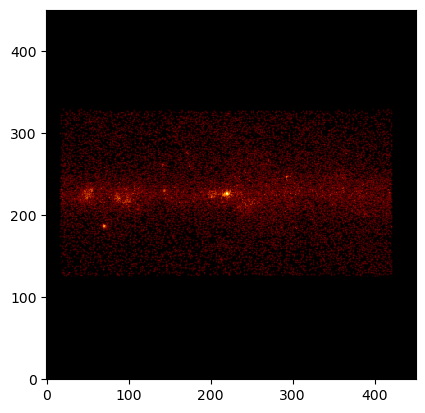

In [34]:
events_3fhl.plot_image()

In addition `EventList` provides convenience methods to filter the event lists. One possible use case is to find the highest energy event within a radius of 0.5 deg around the vela position:

In [35]:
# select all events within a radius of 0.5 deg around center
from gammapy.utils.regions import SphericalCircleSkyRegion

region = SphericalCircleSkyRegion(center, radius=0.5 * u.deg)
events_gc_3fhl = events_3fhl.select_region(region)

# sort events by energy
events_gc_3fhl.table.sort("ENERGY")

# and show highest energy photon
events_gc_3fhl.energy[-1].to("GeV")

<Quantity 1917.859375 GeV>

### Exercises

* Make a counts energy spectrum for the galactic center region, within a radius of 10 deg.

🔝 [Back to Top](#intro)<br>

<a id='scatalogs'></a>
## Source catalogs

Gammapy provides a convenient interface to access and work with catalog based data. 

In this section we will learn how to:

* Load builtins catalogs from `~gammapy.catalog`
* Sort and index the underlying Astropy tables
* Access data from individual sources

Let's start with importing the 3FHL catalog object from the `~gammapy.catalog` submodule:

In [36]:
from gammapy.catalog import SourceCatalog3FHL

First we initialize the Fermi-LAT 3FHL catalog and directly take a look at the `.table` attribute:

In [37]:
fermi_3fhl = SourceCatalog3FHL()
fermi_3fhl.table

Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Signif_Avg,Pivot_Energy,Flux_Density,Unc_Flux_Density,Flux,Unc_Flux,Energy_Flux,Unc_Energy_Flux,Signif_Curve,SpectrumType,Spectral_Index,Unc_Spectral_Index,beta,Unc_beta,PowerLaw_Index,Unc_PowerLaw_Index,Flux_Band [5],"Unc_Flux_Band [5,2]",nuFnu [5],Sqrt_TS_Band [5],Npred,HEP_Energy,HEP_Prob,Variability_BayesBlocks,Extended_Source_Name,ASSOC_GAM,TEVCAT_FLAG,ASSOC_TEV,CLASS,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,Redshift,NuPeak_obs
,deg,deg,deg,deg,deg,deg,deg,,,GeV,1 / (cm2 GeV s),1 / (cm2 GeV s),1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),erg / (cm2 s),,,,,,,,,1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),,,GeV,,,,,,,,,,,,,Hz
bytes18,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes11,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,bytes18,bytes1,bytes21,bytes7,bytes26,bytes26,float32,float32,float32,float32
3FHL J0001.2-0748,0.3107,-7.8075,89.0094,-67.3118,0.0424,0.0424,--,64,5.362,23.73,5.3174e-13,2.0975e-13,2.9593e-11,1.1704e-11,1.6752e-12,1.0743e-12,1.02,PowerLaw,1.6724,0.8274,0.5916,0.7129,2.2226,0.4808,1.1127661e-11 .. 1.1422301e-22,-6.0763976e-12 .. 6.529277e-12,3.533989e-13 .. 1.1789072e-22,3.1458344 .. 0.0,7.63,86.975,0.9964,1,,3FGL J0001.2-0748,N,,bll,PMN J0001-0746,,0.9974,0.9721,--,306196370000000.0
3FHL J0001.9-4155,0.4849,-41.9303,334.1216,-72.0697,0.1018,0.1018,--,429,5.638,28.42,5.4253e-13,1.6839e-13,4.3230e-11,1.3428e-11,3.4900e-12,1.8276e-12,0.45,PowerLaw,1.7819,0.4941,0.1187,0.2798,1.9418,0.3100,2.1003905e-11 .. 1.9287885e-18,-8.032091e-12 .. 5.8594097e-12,6.7452245e-13 .. 2.078675e-18,4.899907 .. 0.0,12.51,266.625,0.9622,1,,3FGL J0002.2-4152,N,,bcu,1RXS J000135.5-415519,,0.9960,0.0000,--,6309576500000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3FHL J2359.1-3038,359.7760,-30.6397,12.7909,-78.0268,0.0231,0.0231,--,70,11.551,21.21,1.8903e-12,4.1965e-13,8.1774e-11,1.8149e-11,4.2849e-12,1.6806e-12,0.08,PowerLaw,2.2865,0.4632,0.0101,0.2434,2.2944,0.3092,5.5015617e-11 .. 6.037456e-17,-1.3604539e-11 .. 8.488618e-12,1.7422797e-12 .. 6.164239e-17,9.39347 .. 0.0,22.41,111.366,0.9607,1,,3FGL J2359.3-3038,P,H 2356-309,bll,H 2356-309,,0.9999,0.9975,0.1650,2.818388e+17
3FHL J2359.3-2049,359.8293,-20.8256,58.0522,-76.5411,0.0722,0.0722,--,580,4.638,19.02,9.1911e-13,3.6043e-13,3.0559e-11,1.1979e-11,1.2593e-12,7.4704e-13,0.32,PowerLaw,2.3402,0.9445,0.1851,0.6600,2.5615,0.5838,2.3253791e-11 .. 8.3778735e-21,-8.939083e-12 .. 6.2386546e-12,7.2875863e-13 .. 8.224765e-21,4.8207045 .. 0.0,8.06,64.177,0.9859,1,,3FGL J2359.5-2052,N,,bll,TXS 2356-210,,0.9894,0.9906,0.0960,4073799600000000.0


The following table contains a description of the reconstructed parameters <a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2):
![alt text here](LAT3FHLFITSFORMAT.png)

This looks very familiar again. The data is just stored as an [astropy.table.Table](http://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table) object. We have all the methods and attributes of the `Table` object available. E.g. we can sort the underlying table by `Signif_Avg` to find the top 5 most significant sources:



In [38]:
type(fermi_3fhl.table["ASSOC1"])

astropy.table.column.Column

In [39]:
# sort table by significance
fermi_3fhl.table.sort("Signif_Avg")

# invert the order to find the highest values and take the top 5
top_five_TS_3fhl = fermi_3fhl.table[::-1][:5]

# print the top five significant sources with association and source class
top_five_TS_3fhl[["Source_Name", "ASSOC1", "ASSOC2", "CLASS", "Signif_Avg"]]

Source_Name,ASSOC1,ASSOC2,CLASS,Signif_Avg
bytes18,bytes26,bytes26,bytes7,float32
3FHL J0534.5+2201,Crab Nebula,,PWN,168.641
3FHL J1104.4+3812,Mkn 421,,BLL,144.406
3FHL J0835.3-4510,PSR J0835-4510,Vela X field,PSR,138.801
3FHL J0633.9+1746,PSR J0633+1746,,PSR,99.734
3FHL J1555.7+1111,PG 1553+113,,BLL,94.411


If you are interested in the data of an individual source you can access the information from catalog using the name of the source or any alias source name that is defined in the catalog:

In [40]:
print(fermi_3fhl["3FHL J0534.5+2201"])


*** Basic info ***

Catalog row index (zero-based) : 1555
Source name          : 3FHL J0534.5+2201
Extended name        :                   
Associations     : Crab Nebula, Crab Nebula, 3FGL J0534.5+2201i
ASSOC_PROB_BAY   : 1.000
ASSOC_PROB_LR    : 1.000
Class            : PWN    
TeVCat flag      : P

*** Other info ***

Significance (10 GeV - 2 TeV)    : 168.641
Npred                            : 2602.9

HEP Energy       : 1463.300 GeV
HEP Probability  : 1.000
Bayesian Blocks  : 1
Redshift         : --
NuPeak_obs       : 0.0 Hz

*** Position info ***

RA                   : 83.635 deg
DEC                  : 22.019 deg
GLON                 : 184.554 deg
GLAT                 : -5.780 deg

Semimajor (95%)      : 0.0080 deg
Semiminor (95%)      : 0.0080 deg
Position angle (95%) : 0.00 deg
ROI number           : 430

*** Spectral fit info ***

Spectrum type                    : PowerLaw   
Significance curvature           : 1.4
Power-law spectral index         : 2.220 +- 0.025
Pivot ener

/home/bornagain/miniconda3/envs/gammapy-0.20.1/lib/python3.8/site-packages/gammapy/catalog/fermi.py:1092: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  ss += "{:<16s} : {:.3f}\n".format("Redshift", d["Redshift"])


In [41]:
mkn_421_3fhl = fermi_3fhl["3FHL J1104.4+3812"]

# or use any alias source name that is defined in the catalog
mkn_421_3fhl = fermi_3fhl["Mkn 421"]
print(mkn_421_3fhl.data["Signif_Avg"])

144.40611


### Exercises

* Try to load the Fermi-LAT 2FHL catalog and check the total number of sources it contains.
* Select all the sources from the 2FHL catalog which are contained in the Galactic Center region. The methods `~gammapy.maps.WcsGeom.contains()` and `~gammapy.catalog.SourceCatalog.positions` might be helpful for this. Add markers for all these sources and try to add labels with the source names. 
* Try to find the source class of the object at position ra=68.6803, dec=9.3331
 

🔝 [Back to Top](#intro)<br>

<a id='smodels'></a>
## Spectral models and flux points

In the previous section we learned how access basic data from individual sources in the catalog. Now we will go one step further and explore the full spectral information of sources. We will learn how to:

* Plot spectral models
* Compute integral and energy fluxes
* Read and plot flux points

As a first example we will start with the Crab Nebula:

In [42]:
crab_3fhl = fermi_3fhl["Crab Nebula"]
crab_3fhl_spec = crab_3fhl.spectral_model()
print(crab_3fhl_spec)

PowerLawSpectralModel

  type      name     value    ... is_norm link
-------- --------- ---------- ... ------- ----
spectral     index 2.2202e+00 ...   False     
spectral amplitude 1.7132e-10 ...    True     
spectral reference 2.2726e+01 ...   False     


The `crab_3fhl_spec` is an instance of the `~gammapy.modeling.models.PowerLaw2SpectralModel` model, with the parameter values and errors taken from the 3FHL catalog. 

Let's plot the spectral model in the energy range between 10 GeV and 2000 GeV:

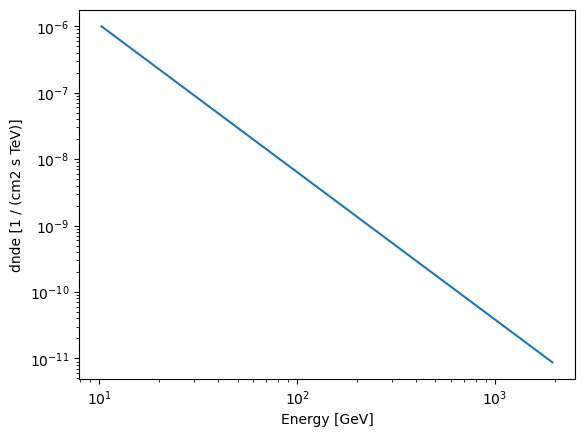

In [43]:
ax_crab_3fhl = crab_3fhl_spec.plot(
    energy_bounds=[10, 2000] * u.GeV, energy_power=0
)

We assign the return axes object to variable called `ax_crab_3fhl`, because we will re-use it later to plot the flux points on top.

To compute the differential flux at 100 GeV we can simply call the model like normal Python function and convert to the desired units:

In [44]:
crab_3fhl_spec(100 * u.GeV).to("cm-2 s-1 GeV-1")

<Quantity 6.38489128e-12 1 / (cm2 GeV s)>

Next we can compute the integral flux of the Crab between 10 GeV and 2000 GeV:

In [45]:
crab_3fhl_spec.integral(energy_min=10 * u.GeV, energy_max=2000 * u.GeV).to(
    "cm-2 s-1"
)

<Quantity 8.67457342e-09 1 / (cm2 s)>

We can easily convince ourself, that it corresponds to the value given in the Fermi-LAT 3FHL catalog:

In [46]:
crab_3fhl.data["Flux"]

<Quantity 8.658909e-09 1 / (cm2 s)>

In addition we can compute the energy flux between 10 GeV and 2000 GeV:

In [47]:
crab_3fhl_spec.energy_flux(energy_min=10 * u.GeV, energy_max=2000 * u.GeV).to(
    "erg cm-2 s-1"
)

<Quantity 5.31148917e-10 erg / (cm2 s)>

Next we will access the flux points data of the Crab:

In [48]:
print(crab_3fhl.flux_points)

FluxPoints
----------

  geom                   : RegionGeom
  axes                   : ['lon', 'lat', 'energy']
  shape                  : (1, 1, 5)
  quantities             : ['norm', 'norm_errp', 'norm_errn', 'norm_ul', 'sqrt_ts', 'is_ul']
  ref. model             : pl
  n_sigma                : 1
  n_sigma_ul             : 2
  sqrt_ts_threshold_ul   : 1
  sed type init          : flux



If you want to learn more about the different flux point formats you can read the specification [here](https://gamma-astro-data-formats.readthedocs.io/en/latest/spectra/flux_points/index.html).

No we can check again the underlying astropy data structure by accessing the `.table` attribute:

In [49]:
crab_3fhl.flux_points.to_table(sed_type="dnde", formatted=True)

e_ref,e_min,e_max,dnde,dnde_errp,dnde_errn,dnde_ul,sqrt_ts,is_ul
GeV,GeV,GeV,1 / (cm2 GeV s),1 / (cm2 GeV s),1 / (cm2 GeV s),1 / (cm2 GeV s),,
float64,float64,float64,float64,float64,float64,float64,float32,bool
14.142,10.000,20.000,5.120e-10,1.321e-11,1.321e-11,nan,125.157,False
31.623,20.000,50.000,7.359e-11,2.842e-12,2.842e-12,nan,88.715,False
86.603,50.000,150.000,9.024e-12,5.367e-13,5.367e-13,nan,59.087,False
273.861,150.000,500.000,7.660e-13,8.707e-14,8.097e-14,nan,33.076,False
1000.000,500.000,2000.000,4.291e-14,1.086e-14,9.393e-15,nan,15.573,False


Finally let's combine spectral model and flux points in a single plot and scale with `energy_power=2` to obtain the spectral energy distribution:

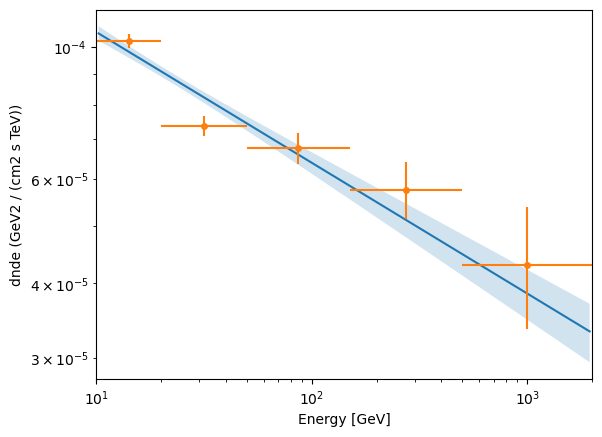

In [50]:
ax = crab_3fhl_spec.plot(energy_bounds=[10, 2000] * u.GeV, energy_power=2)
ax = crab_3fhl_spec.plot_error(
    energy_bounds=[10, 2000] * u.GeV,
    energy_power=2,
    facecolor="tab:blue"
)
crab_3fhl.flux_points.plot(ax=ax, sed_type="dnde", energy_power=2);

### Exercises

* Plot the spectral model and flux points for PKS 2155-304 for the 3FGL and 2FHL catalogs. Try to plot the error of the model (aka "Butterfly") as well. Note this requires the [uncertainties package](https://pythonhosted.org/uncertainties/) to be installed on your machine.


## What next?

This was a quick introduction to some of the high level classes in Astropy and Gammapy.

* To learn more about those classes, go to the API docs (links are in the introduction at the top).
* To learn more about other parts of Gammapy (e.g. Fermi-LAT and TeV data analysis), check out the other tutorial notebooks.
* To see what's available in Gammapy, browse the Gammapy docs or use the full-text search.
* If you have any questions, ask on the mailing list.

🔝 [Back to Top](#intro)<br>

## References
<a name="cite_note-1"></a>1. [](#cite_ref-1) Cicerone: Data — LAT Data Files - Column Descriptions. Retrieved [November 5, 2022] from https://fermi.gsfc.nasa.gov/ssc/data/analysis/documentation/Cicerone/Cicerone_Data/LAT_Data_Columns.html.

<a name="cite_note-2"></a>2. [](#cite_ref-2)M. Ajello et al. [Fermi-LAT Collaboration], TFHL:
The third catalog of hard Fermi-LAT sources, Astrophys.
J. Suppl. 232, no. 2, 18 (2017) doi:10.3847/1538-4365/aa8221
[arXiv:1702.00664v3 [astro-ph.HE]].

🔝 [Back to Top](#intro)<br>

<a id='elparameters'></a>

The description of the reconstructed parameters in the event list<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1):

## Table 1

|Index| Event Parameter (units) |Description | 
|:-|  :-|:- |
|0|ENERGY (MeV) | Reconstructed energy of the event |
|1|RA (degrees) | Reconstructed direction of the event in Right Ascension |
|2|DEC (degrees) | Reconstructed direction of the event in Declination|
|3|L (degrees) | Reconstructed direction of the event in Galactic Longitude|
|4|B (degrees) | Reconstructed direction of the event in Galactic Latitude|
|5|THETA (degrees) | Reconstructed angle of incidence of the event with respect to the LAT boresight (+Z axis of the spacecraft - the line normal to the top surface of the LAT)|
|6|PHI (degrees) | Reconstructed angle of incidence of the event with respect to the +X axis (the line normal to the sun-facing side of the spacecraft)|
|7|ZENITH_ANGLE (degrees) | Angle between the reconstructed event direction and the zenith line (originates at the center of the Earth and passes through the center of mass of the spacecraft)|
|8|EARTH_AZIMUTH_ANGLE (degrees) | Angle of the reconstructed event direction with respect to North (line from spacecraft origin to north celestial pole) as projected onto a plane normal to the zenith. The angle is measured in degrees east of north, such that 90 degrees indicates that the event originated from the west|
|9|TIME (seconds) | Mission elapsed time when the event was detected (MET is the total number of seconds since 00:00:00 on January 1, 2001 UTC)|
|10|EVENT_ID | Sequence number for the event in the LAT data acquisition period|
|11|RUN_ID | Unique identifier for each LAT data acquisition period|
|12|RECON_VERSION | Version of event reconstruction software in use at the time the event was detected|
|13|CALIB_VERSION (3-element array) | Version of the calibration tables for the ACD, CAL, and TKR (in that order) in use at the time the event was detected. (This column is currently unused)|
|14|EVENT_CLASS | A bitfield indicating which event class selections a given event has passed. In Pass 8 the internal FITS format of this column has been changed from a 32-bit integer (TFORMn=J) to a 32-bit bit column (TFORMn=32X) and supports bitwise selections with the fselect FTOOL. Pass 8 populates a much larger number of bit values than Pass 7. Bits for the recommended event classes are bit 4 (P8R2_TRANSIENT020), bit 7 (P8R2_SOURCE), and bit 10 (P8R2_ULTRACLEANVETO)|
|15|EVENT_TYPE | A bitfield indicating which event type selections a given event has passed. This column is a 32-bit bit column (TFORMn=32X) and supports bitwise selections with fselect.
|16|CONVERSION_TYPE | Indicates whether the event induced pair production in the front (thin) layers or the back (thick) layers of the tracker (front=0, back=1)|
|17|LIVETIME (seconds) | A short-term measure of accumulated livetime of the LAT. This value can have gaps and it resets every few seconds. For large time intervals, the LIVETIME documented in the spacecraft file is correct. However, for short time intervals, this LIVETIME value can be compared between two events to gauge the fraction of dead time|
|18|DIFRSP0 | Diffuse response for an additional component (currently unused)|
|19|DIFRSP1 | Diffuse response for an additional component (currently unused)|
|20|DIFRSP2 | Diffuse response for an additional component (currently unused)|
|21|DIFRSP3 | Diffuse response for an additional component (currently unused)|
|22|DIFRSP4 | Diffuse response for an additional component (currently unused)|

